In [39]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

In [40]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [41]:
#Checking the shape of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [42]:
df_train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [43]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [44]:
#check duplicate datas (kiem tra du lieu co bi trung lap hay khong)
print(f'Duplicates in train set:{df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),2)}%)')
print(f'Duplicates in test set:{df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),2)}%)')

Duplicates in train set:0, (0.0%)
Duplicates in test set:0, (0.0%)


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [46]:
df_train.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [47]:
df_train['Age'].value_counts()

Age
22369    79
22388    71
20684    71
19060    70
16279    66
         ..
16939     1
13728     1
23111     1
13170     1
18628     1
Name: count, Length: 391, dtype: int64

## Data Visualization

C:\Users\User\AppData\Local\Temp\ipykernel_8108\1505974740.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-10000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Age'] <= 10000, 'Age_group'] = 'Age_0-10000'
C:\Users\User\AppData\Local\Temp\ipykernel_8108\1505974740.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Age_0-10000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Age'] <= 10000, 'Age_group'] = 'Age_0-10000'


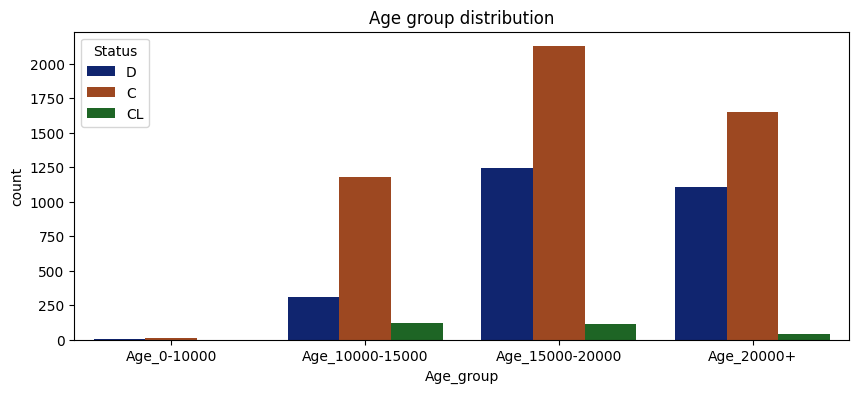

In [48]:
#separate the Age column to group
data_cleaner = [df_train, df_test]
for dataset in data_cleaner:
    dataset['Age_group'] = np.nan
    dataset.loc[dataset['Age'] <= 10000, 'Age_group'] = 'Age_0-10000'
    dataset.loc[(dataset['Age'] > 10000) & (dataset['Age'] < 15000), 'Age_group'] = 'Age_10000-15000'
    dataset.loc[(dataset['Age'] >= 15000) & (dataset['Age'] <= 20000), 'Age_group'] = 'Age_15000-20000'
    dataset.loc[dataset['Age']>20000,'Age_group']='Age_20000+'

plt.figure(figsize=(10,4))
g=sns.countplot(data=df_train, x='Age_group',  hue='Status', palette='dark', order=['Age_0-10000','Age_10000-15000','Age_15000-20000','Age_20000+'])
plt.title('Age group distribution');

In [49]:
df_train['Sex'].value_counts()

Sex
F    7336
M     569
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

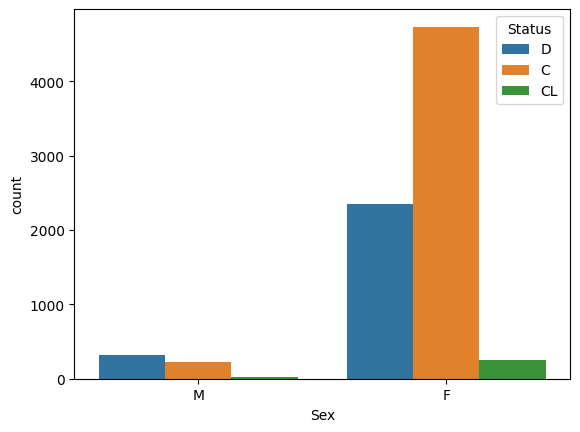

In [50]:
sns.countplot(x=df_train['Sex'], data=df_train, hue=df_train['Status'])

<Axes: xlabel='Drug', ylabel='count'>

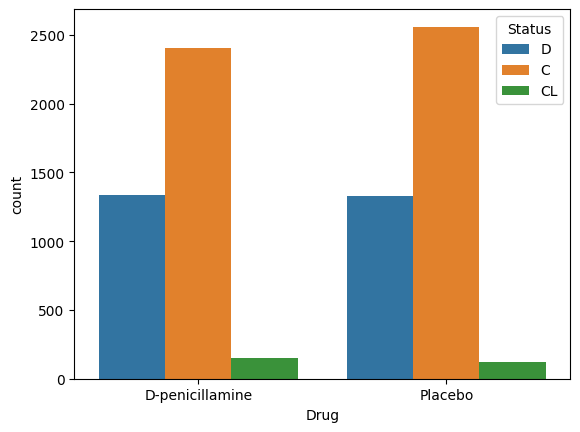

In [51]:
sns.countplot(x=df_train['Drug'], hue=df_train['Status'], data=df_train)

In [52]:
df_train['Cholesterol'].value_counts()

Cholesterol
448.0     152
248.0     151
263.0     143
298.0     138
232.0     131
         ... 
431.0       1
557.0       1
658.0       1
1236.0      1
671.0       1
Name: count, Length: 226, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_8108\3867589825.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low_Cholesterol' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Cholesterol'] <= 150, 'Cholesterol_group'] = 'Low_Cholesterol'
C:\Users\User\AppData\Local\Temp\ipykernel_8108\3867589825.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low_Cholesterol' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Cholesterol'] <= 150, 'Cholesterol_group'] = 'Low_Cholesterol'


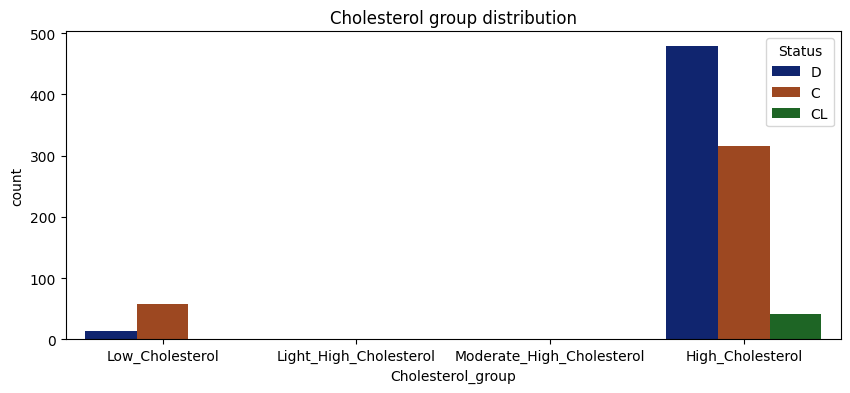

In [53]:
#separate the Cholesterol column to group
data_cleaner = [df_train, df_test]
for dataset in data_cleaner:
    dataset['Cholesterol_group'] = np.nan
    dataset.loc[dataset['Cholesterol'] <= 150, 'Cholesterol_group'] = 'Low_Cholesterol'
    dataset.loc[(dataset['Cholesterol'] >=150) & (dataset['Age'] <= 199), 'Cholesterol_group'] = 'Light_High_Cholesterol'
    dataset.loc[(dataset['Cholesterol'] >= 200) & (dataset['Age'] <= 499), 'Cholesterol_group'] = 'Moderate_High_Cholesterol'
    dataset.loc[dataset['Cholesterol']>500,'Cholesterol_group']='High_Cholesterol'

plt.figure(figsize=(10,4))
g=sns.countplot(data=df_train, x='Cholesterol_group',  hue='Status', palette='dark', order=['Low_Cholesterol','Light_High_Cholesterol','Moderate_High_Cholesterol',
                                                                                            'High_Cholesterol'])
plt.title('Cholesterol group distribution');

In [54]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_group,Cholesterol_group
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,Age_20000+,NaN
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,...,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,Age_15000-20000,NaN
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,Age_10000-15000,NaN
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,...,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,Age_15000-20000,NaN
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,...,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,Age_15000-20000,NaN


<Axes: xlabel='Hepatomegaly'>

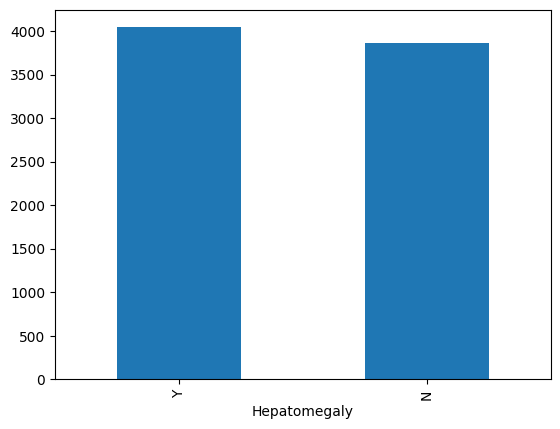

In [55]:
df_train['Hepatomegaly'].value_counts().plot(kind='bar')

In [56]:
df_train['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [57]:
df_train.isnull().sum()

id                      0
N_Days                  0
Drug                    0
Age                     0
Sex                     0
Ascites                 0
Hepatomegaly            0
Spiders                 0
Edema                   0
Bilirubin               0
Cholesterol             0
Albumin                 0
Copper                  0
Alk_Phos                0
SGOT                    0
Tryglicerides           0
Platelets               0
Prothrombin             0
Stage                   0
Status                  0
Age_group               0
Cholesterol_group    6996
dtype: int64

In [58]:
#fill the missing data of Cholesterol_group
df_train['Cholesterol_group'].fillna(df_train['Cholesterol_group'].mode()[0], inplace=True)
df_test['Cholesterol_group'].fillna(df_test['Cholesterol_group'].mode()[0], inplace=True)
df_train.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_8108\9737298.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Cholesterol_group'].fillna(df_train['Cholesterol_group'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8108\9737298.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

id                   0
N_Days               0
Drug                 0
Age                  0
Sex                  0
Ascites              0
Hepatomegaly         0
Spiders              0
Edema                0
Bilirubin            0
Cholesterol          0
Albumin              0
Copper               0
Alk_Phos             0
SGOT                 0
Tryglicerides        0
Platelets            0
Prothrombin          0
Stage                0
Status               0
Age_group            0
Cholesterol_group    0
dtype: int64

In [59]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_group,Cholesterol_group
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,...,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,Age_15000-20000,High_Cholesterol
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,...,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,Age_10000-15000,High_Cholesterol
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,...,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,Age_10000-15000,High_Cholesterol
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,...,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,Age_20000+,High_Cholesterol
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,...,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,Age_20000+,High_Cholesterol


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7905 non-null   int64  
 1   N_Days             7905 non-null   int64  
 2   Drug               7905 non-null   object 
 3   Age                7905 non-null   int64  
 4   Sex                7905 non-null   object 
 5   Ascites            7905 non-null   object 
 6   Hepatomegaly       7905 non-null   object 
 7   Spiders            7905 non-null   object 
 8   Edema              7905 non-null   object 
 9   Bilirubin          7905 non-null   float64
 10  Cholesterol        7905 non-null   float64
 11  Albumin            7905 non-null   float64
 12  Copper             7905 non-null   float64
 13  Alk_Phos           7905 non-null   float64
 14  SGOT               7905 non-null   float64
 15  Tryglicerides      7905 non-null   float64
 16  Platelets          7905 

In [61]:
OBJ_LIST = [o_class for o_class in df_train.columns if df_train[o_class].dtype == 'object']
OBJ_LIST_EXCEPT = [o_class for o_class in df_train.columns if df_train[o_class].dtype == 'object' and o_class not in ['Status']]
OBJ_LIST, OBJ_LIST_EXCEPT

(['Drug',
  'Sex',
  'Ascites',
  'Hepatomegaly',
  'Spiders',
  'Edema',
  'Status',
  'Age_group',
  'Cholesterol_group'],
 ['Drug',
  'Sex',
  'Ascites',
  'Hepatomegaly',
  'Spiders',
  'Edema',
  'Age_group',
  'Cholesterol_group'])

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in OBJ_LIST:
    df_train[col] = le.fit_transform(df_train[col])
for col_2 in OBJ_LIST_EXCEPT:
    df_test[col_2] = le.fit_transform(df_test[col_2])
print(df_train.head())
print(df_test.head())

   id  N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0   0     999     0  21532    1        0             0        0      0   
1   1    2574     1  19237    0        0             0        0      0   
2   2    3428     1  13727    0        0             1        1      2   
3   3    2576     1  18460    0        0             0        0      0   
4   4     788     1  16658    0        0             1        0      0   

   Bilirubin  ...  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        2.3  ...   172.0    1601.0  179.80           63.0      394.0   
1        0.9  ...    63.0    1440.0  134.85           88.0      361.0   
2        3.3  ...   131.0    1029.0  119.35           50.0      199.0   
3        0.6  ...    58.0    1653.0   71.30           96.0      269.0   
4        1.1  ...    63.0    1181.0  125.55           96.0      298.0   

   Prothrombin  Stage  Status  Age_group  Cholesterol_group  
0          9.7    3.0       2          3              

In [63]:
x = df_train.drop(['Status'], axis=1)
y = df_train.Status
print(y)

0       2
1       0
2       2
3       0
4       0
       ..
7900    0
7901    0
7902    2
7903    2
7904    0
Name: Status, Length: 7905, dtype: int32


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6324, 21), (1581, 21), (6324,), (1581,))

## Build two model to train the data and detect it on test.csv file

In [65]:
#XGBoost library dependencies
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
y_pred_xgb = model_xgb.predict(x_test)
y_pred_xgb

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_xgb)

0.8317520556609741

In [68]:
print(confusion_matrix(y_test, y_pred_xgb))

[[889   8  69]
 [ 26  10  16]
 [145   2 416]]


Accuracy of RandomForest Classifier: 0.8336495888678052
Confusion Matrix of RandomForest Classifier: [[902   2  62]
 [ 30   7  15]
 [153   1 409]]


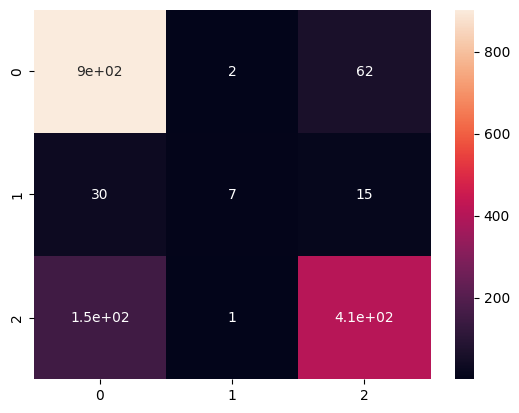

In [69]:
import pandas as pd
import seaborn as sns

class RandomForestClassifier:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
    
    def random_forest_classifier(self):
        from sklearn.ensemble import RandomForestClassifier
        model_rf = RandomForestClassifier()
        model_rf.fit(self.x_train, self.y_train)
        y_pred_rf = model_rf.predict(self.x_test)
        from sklearn.metrics import accuracy_score, confusion_matrix
        print(f'Accuracy of RandomForest Classifier: {accuracy_score(self.y_test, y_pred_rf)}')
        print(f'Confusion Matrix of RandomForest Classifier: {confusion_matrix(self.y_test, y_pred_rf)}')
        sns.heatmap(confusion_matrix(self.y_test, y_pred_rf), annot=True)
        return model_rf

# Execute the RandomForestClassifier
rf = RandomForestClassifier(x_train, y_train, x_test, y_test)
model_rf = rf.random_forest_classifier()

In [70]:
#submit result on Kaggle - df_test
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_group,Cholesterol_group
0,7905,3839,0,19724,0,0,1,0,0,1.2,...,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,2,0
1,7906,2468,0,14975,0,0,0,0,0,1.1,...,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,1,0
2,7907,51,1,13149,0,0,1,0,2,2.0,...,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,1,0
3,7908,2330,0,20510,0,0,0,0,0,0.6,...,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,3,0
4,7909,1615,0,21904,0,0,1,0,0,1.4,...,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,3,0


In [71]:
#predict on df_test
y_pred_test = model_rf.predict(df_test)
y_pred_test

array([0, 0, 2, ..., 0, 0, 2])

In [72]:
#try to format on Kaggle
submission = pd.DataFrame({'id': df_test['id'], 'Status': y_pred_test})
submission.head()

,id,Status
0,7905,0
1,7906,0
2,7907,2
3,7908,0
4,7909,0


In [73]:
submission.to_csv('result_predict.csv', index=False)

In [74]:
submission['Status'].value_counts()

Status
0    3644
2    1608
1      19
Name: count, dtype: int64

In [79]:
# Assuming you have the actual status and predicted status stored in variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Status'] = le.fit_transform(df_train['Status'])
actual_status = df_train['Status']
data_train = df_train.drop(['Status'], axis=1)
predicted_status = model_rf.predict(data_train)

# Create a DataFrame to display actual and predicted statuses side by side
comparison_df = pd.DataFrame({
    'Actual_Status': actual_status,
    'Predicted_Status': predicted_status
})

# Display the DataFrame
print(comparison_df)
#show the accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(actual_status, predicted_status)
print('Accuracy:', accuracy)
#(where 0: C, 1: D, 2: CL)

      Actual_Status  Predicted_Status
0                 2                 2
1                 0                 0
2                 2                 2
3                 0                 0
4                 0                 0
...             ...               ...
7900              0                 0
7901              0                 0
7902              2                 2
7903              2                 0
7904              0                 0

[7905 rows x 2 columns]
Accuracy: 0.966729917773561
